<a href="https://colab.research.google.com/github/soju1jan/modoo/blob/master/15_MNIST_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Epoch 00001: val_loss improved from inf to 0.15488, saving model to /content/drive/My Drive/10_colab_dataset/model3/01-0.1549.hdf5

Epoch 00002: val_loss improved from 0.15488 to 0.10488, saving model to /content/drive/My Drive/10_colab_dataset/model3/02-0.1049.hdf5

Epoch 00003: val_loss improved from 0.10488 to 0.08429, saving model to /content/drive/My Drive/10_colab_dataset/model3/03-0.0843.hdf5

Epoch 00004: val_loss improved from 0.08429 to 0.07928, saving model to /content/drive/My Drive/10_colab_dataset/model3/04-0.0793.hdf5

Epoch 00005: val_loss improved from 0.07928 to 0.06677, saving model to /content/drive/My Drive/10_colab_dataset/model3/05-0.0668.hdf5

Epoch 00006: val_loss improved from 0.06677 to 0.06498, saving model to /content/drive/My Drive/10_colab_dataset/model3/06-0.0650.hdf5

Epoch 00007: val_loss did not improve from 0.06498

Epoch 00008: val_loss improved from 0.06498 to 0.06421, saving model to /content/drive/My Drive/10_colab_dataset/model3/08-0.0642.hdf5


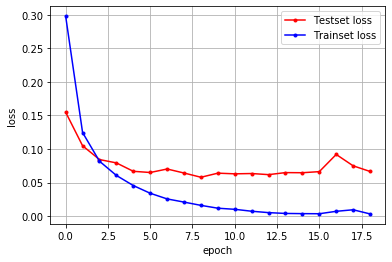

In [8]:
# ----------------------------------------------
# MNIST 손글씨 인식
# ----------------------------------------------

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],784).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{valloss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)
# 모델 저장 폴더 설정 => 구글 드라이브에 저장
MODEL_DIR = '/content/drive/My Drive/10_colab_dataset/model3/'
if not os.path.exists(MODEL_DIR): 
  os.mkdir(MODEL_DIR)

# # 모델 업데이트 및 저장
modelpath="/content/drive/My Drive/10_colab_dataset/model3/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()